In [28]:
from pathlib import Path
from IPython.display import display

import numpy as np
import pandas as pd

import spotipy
import lib_spotify_app.api_adapter as api_adapter
import lib_spotify_app.enrich_artist_genre as enrich_artist_genre

pd.set_option('max_columns', None)

In [29]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [30]:
credential_fp = Path(r'private/spotify_credential.json')

In [31]:
sp = api_adapter.setup_spotipy(
    credential_fp,
    scope=['user-library-read','user-top-read'],
    cache_path=Path(r'private')
)

In [32]:
df = pd.read_csv(r'private/data.csv', sep='\t')

In [33]:
pd.concat(
    [df.filter(regex='^artists\.\d+\.id')[col]
        for col in df.filter(regex='^artists\.\d+\.id')]
).dropna().unique()

array(['2mVTkiwfm4ic6DnHpmFq8K', '562Od3CffWedyz2BbeYWVn',
       '57ylwQTnFnIhJh4nu4rxCs', ..., '7BMccF0hQFBpP6417k1OtQ',
       '4Y20EQTAHxdstkE2JJS3IY', '0CKa42Jqrc9fSFbDjePaXP'], dtype=object)

In [34]:
genre = enrich_artist_genre.EnrichArtistGenre(
    artists_id=df.filter(regex='^artists\.\d+\.id'),
    sp=sp
)

To analyse the genre, we apply a one-hot encoding for each possible genre and the artists are in index (as the genre is defined by the artist in Spotify database)
We get the following table

In [35]:
genre.df_genre

21st century classical  abstract hip hop  abstractro  \
artists_id                                                                     
2mVTkiwfm4ic6DnHpmFq8K                       0                 0           0   
562Od3CffWedyz2BbeYWVn                       0                 0           0   
57ylwQTnFnIhJh4nu4rxCs                       0                 0           0   
01WjpKiWVNurV5hjIadB8C                       0                 0           0   
5ZoBIfUizydbcI4XggC56a                       0                 0           0   
...                                        ...               ...         ...   
7dG0oG7NmmndPNaORvzwj9                       0                 0           0   
7E4yppLZhjBxHC1pH5JGbu                       0                 0           0   
7BMccF0hQFBpP6417k1OtQ                       0                 0           0   
4Y20EQTAHxdstkE2JJS3IY                       0                 0           0   
0CKa42Jqrc9fSFbDjePaXP                       0                 0           0   

                        acid rock  acoustic pop  action rock  adelaide indie  \
artists_id                                                                     
2mVTkiwfm4ic6DnHpmFq8K          0             0            0               0   
562Od3CffWedyz2BbeYWVn          0             0            0               0   
57ylwQTnFnIhJh4nu4rxCs          0             0            0               0   
01WjpKiWVNurV5hjIadB8C          0             0            0               0   
5ZoBIfUizydbcI4XggC56a          0             0            0               0   
...                           ...           ...          ...             ...   
7dG0oG7NmmndPNaORvzwj9          0             0            0               0   
7E4yppLZhjBxHC1pH5JGbu          0             0            0               0   
7BMccF0hQFBpP6417k1OtQ          0             0            0               0   
4Y20EQTAHxdstkE2JJS3IY          0             0            0               0   
0CKa42Jqrc9fSFbDjePaXP          0             0            0               0   

                        adult standards  african rock  afro house  afrobeat  \
artists_id                                                                    
2mVTkiwfm4ic6DnHpmFq8K                0             0           0         0   
562Od3CffWedyz2BbeYWVn                0             0           0         0   
57ylwQTnFnIhJh4nu4rxCs                0             0           0         0   
01WjpKiWVNurV5hjIadB8C                0             0           0         0   
5ZoBIfUizydbcI4XggC56a                0             0           0         0   
...                                 ...           ...         ...       ...   
7dG0oG7NmmndPNaORvzwj9                0             0           0         0   
7E4yppLZhjBxHC1pH5JGbu                0             0           0         0   
7BMccF0hQFBpP6417k1OtQ                0             0           0         0   
4Y20EQTAHxdstkE2JJS3IY                0             0           0         0   
0CKa42Jqrc9fSFbDjePaXP                0             0           0         0   

                        afrofuturism  afropop  afroswing  alabama indie  \
artists_id                                                                
2mVTkiwfm4ic6DnHpmFq8K             0        0          0              0   
562Od3CffWedyz2BbeYWVn             0        0          0              0   
57ylwQTnFnIhJh4nu4rxCs             0        0          0              0   
01WjpKiWVNurV5hjIadB8C             0        0          0              0   
5ZoBIfUizydbcI4XggC56a             0        0          0              0   
...                              ...      ...        ...            ...   
7dG0oG7NmmndPNaORvzwj9             0        0          0              0   
7E4yppLZhjBxHC1pH5JGbu             0        0          0              0   
7BMccF0hQFBpP6417k1OtQ             0        0          0              0   
4Y20EQTAHxdstkE2JJS3IY             0        0          0              0   
0CKa42Jqrc9fSF

Below is a list of all artists without a genre...

In [36]:
display(sum(genre.feature.genres.map(len) == 0))
genre.feature.name[genre.feature.genres.map(len) == 0].values

387

array(['The Eeries', 'Noclu', 'Carbon Airways', 'Lou Donaldson',
       'Rapscallions', 'Scars On Broadway', 'Joe Lovano Us Five',
       'March to the Grave', 'Shock Machine', '3',
       'IAMTHEKIDYOUKNOWWHATIMEAN', 'Tanooki Suit', 'Claire Wyndham',
       'Kids Original Motion Picture Soundtrack',
       'the one and only PPL MVR', 'Monoral', 'Jakob', 'Autumns Eyes',
       'Arno Alyvan', 'Boyfrndz', 'Museum', '...Bender', 'O.S.I.',
       'Mylets', 'Levee Walkers', 'Our Oceans', 'Addict', 'Jogger',
       'Minor Victories', 'Earl Greyhound', 'Stone Giant', 'The Wipers',
       'Elektrik People', 'Infinity Shred', 'Painted Wives', 'Comforter',
       'Data Romance', 'EL VY', 'D Numbers', 'Abnormal Thought Patterns',
       'Soul Remnants', 'Magna Carta Cartel', 'Winter Family',
       'El Huervo', 'Armonie Chamber Orchestra', 'Without Waves',
       'Button Down Brass', 'Deadly Apples', 'Octavision', 'Red Vox',
       'Trouble Andrew', 'Doom Side of the Moon', 'Subvision',
       'J

Now I will clean the geo-genre (genre specific to a country or city) with spacy, the number of artists without a genre should not change

In [37]:
import spacy
nlp = spacy.load("en_core_web_sm")

# detect in each word in the genre name if it recognizes as a country, 
# state, language, etc... Genre should be independant of country
def clean_geo(x:str):
    is_geo = False
    for word in x.split(' '):
        for ent in list(nlp(word).ents):
            is_geo = is_geo or (ent.label_ in ['NORP', 'GPE', 'LOC'])
    return is_geo

genre.genre.to_series().apply(lambda x: clean_geo(str(x))).sum()

337

In [38]:
genre.clean_geo_genre()
display(genre._genre_geo)

Index(['african rock', 'arizona punk', 'athens indie', 'atlanta indie',
       'australian alternative rock', 'australian dance',
       'australian electropop', 'australian garage punk', 'australian hip hop',
       'australian house',
       ...
       'vegas indie', 'vermont indie', 'vienna indie',
       'vintage french electronic', 'virginia metal', 'washington indie',
       'west australian hip hop', 'west virginia indie', 'wisconsin indie',
       'wuhan indie'],
      dtype='object', length=337)

In [39]:
display(sum(genre.feature.genres.map(len) == 0))

387

So indeed, the number of artists without a genre did not change (387) and the number of genre reduced of 336
I calculate a distance metric between each genre to find which could be cluster together

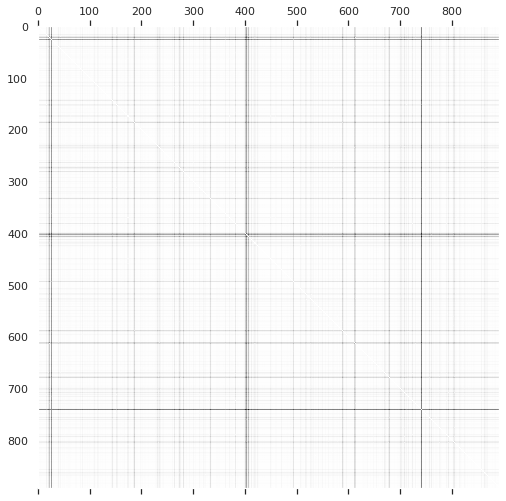

In [40]:
from scipy.spatial.distance import squareform, pdist
dist = squareform(pdist(genre.df_genre.transpose(), metric='hamming'))

plt.matshow(dist, cmap='Greys')
plt.grid(None)

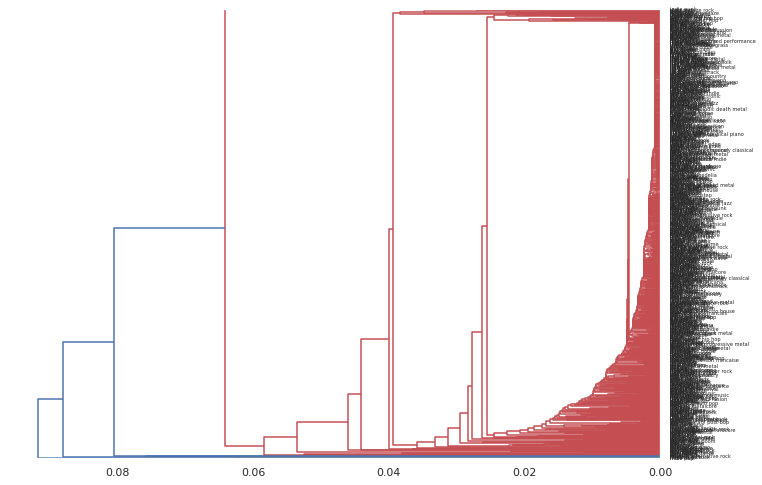

In [41]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
l = linkage(
    genre.df_genre.transpose(),
    method='weighted',
    metric='hamming'
)
plt.figure()
dendrogram(
    l,
    orientation='left',
    labels=genre.genre.to_list()
);

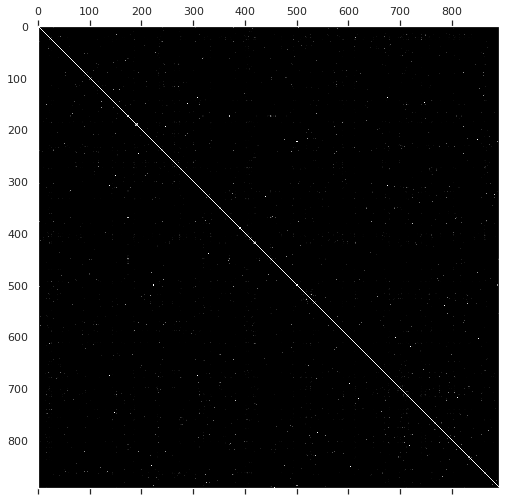

In [42]:
from scipy.spatial.distance import squareform, pdist
dist = squareform(pdist(genre.df_genre.transpose(), metric='jaccard'))

plt.matshow(dist, cmap='Greys')
plt.grid(None)

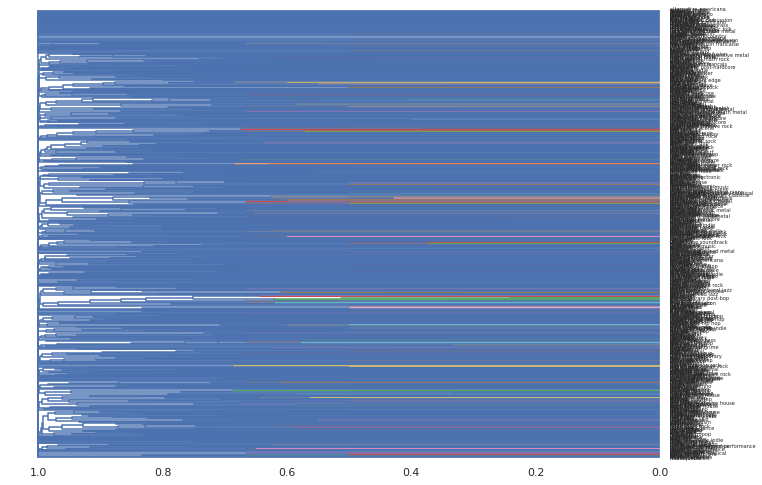

In [43]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
l = linkage(
    genre.df_genre.transpose(),
    method='weighted',
    metric='jaccard'
)
plt.figure()
dendrogram(
    l,
    orientation='left',
    labels=genre.genre.to_list()
);

Jaccard, Hamming and Yule are the possible metric I could use. They are done for binary array or encounters.

From the previous plot and their definition I will go with Hamming because:
* with Hamming we can indeed see the genre clustered hierarchicaly between all of them (like a ranking would do)
* mathematically Jaccard count what we search for, which is an association of genre which meet often but they meet so few that it would be a very small value

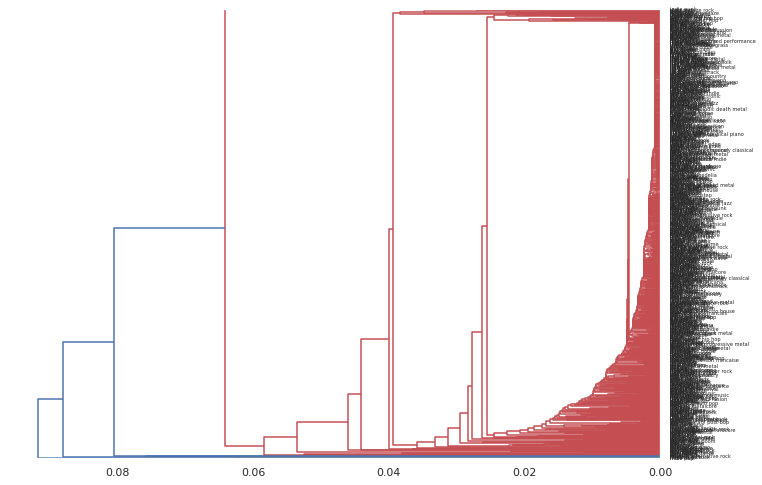

In [44]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import jaccard

l = linkage(
    genre.df_genre.transpose(),
    method='weighted',
    metric='hamming'
)
plt.figure()
dendrogram(
    l,
    orientation='left',
    labels=genre.genre.to_list()
);

there is 20 supergenres


indie pop  rock indie  rock modern  rock  rock alternative  \
0    indie pop  indie rock  modern rock  rock  alternative rock   
1          NaN         NaN          NaN   NaN               NaN   
2          NaN         NaN          NaN   NaN               NaN   
3          NaN         NaN          NaN   NaN               NaN   
4          NaN         NaN          NaN   NaN               NaN   
..         ...         ...          ...   ...               ...   
857        NaN         NaN          NaN   NaN               NaN   
858        NaN         NaN          NaN   NaN               NaN   
859        NaN         NaN          NaN   NaN               NaN   
860        NaN         NaN          NaN   NaN               NaN   
861        NaN         NaN          NaN   NaN               NaN   

    dance punk new rave alternative  electronica  indietronica  art pop  \
0                 alternative dance  electronica  indietronica  art pop   
1                        dance-punk          NaN           NaN      NaN   
2                          new rave          NaN           NaN      NaN   
3                               NaN          NaN           NaN      NaN   
4                               NaN          NaN           NaN      NaN   
..                              ...          ...           ...      ...   
857                             NaN          NaN           NaN      NaN   
858                             NaN          NaN           NaN      NaN   
859                             NaN          NaN           NaN      NaN   
860                             NaN          NaN           NaN      NaN   
861                             NaN          NaN           NaN      NaN   

    metal nu post grunge alternative psych chamber garage  rock indie english  \
0                  alternative metal        chamber psych  english indie rock   
1                           nu metal         garage psych                 NaN   
2                        post-grunge                  NaN                 NaN   
3                                NaN                  NaN                 NaN   
4                                NaN                  NaN                 NaN   
..                               ...                  ...                 ...   
857                              NaN                  NaN                 NaN   
858                              NaN                  NaN                 NaN   
859                              NaN                  NaN                 NaN   
860                              NaN                  NaN                 NaN   
861                              NaN                  NaN                 NaN   

                 indie rock  \
0    21st century classical   
1          abstract hip hop   
2                abstractro   
3                 acid rock   
4              acoustic pop   
..                      ...   
857                   world   
858               wrestling   
859              yacht rock   
860                 zapstep   
861                    zolo   

    shoegaze american dream fi slow nu gaze freak core folk lo pop  \
0                                    american shoegaze               
1                                            dream pop               
2                                           freak folk               
3                                                lo-fi               
4                                              nu gaze               
..                                                 ...               
857                                                NaN               
858                                                NaN               
859                                                NaN               
860                                                NaN               
861                                                NaN               

     neo psychedelic  post rock  post hardcore  garage rock indie  punk indie  \
0    neo-psychedelic  post-rock

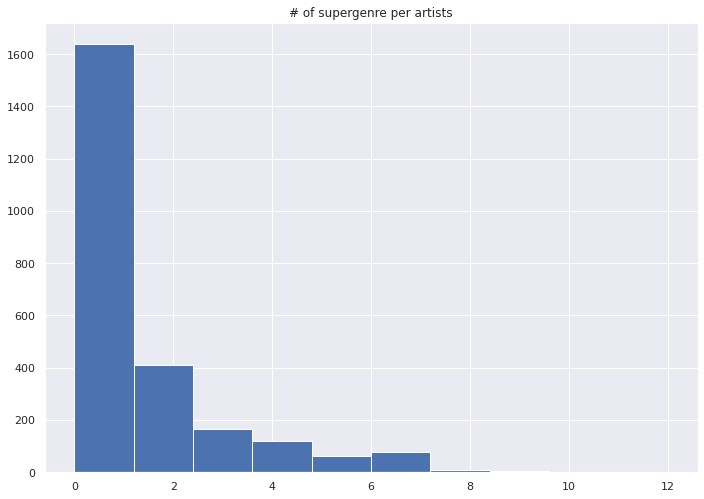

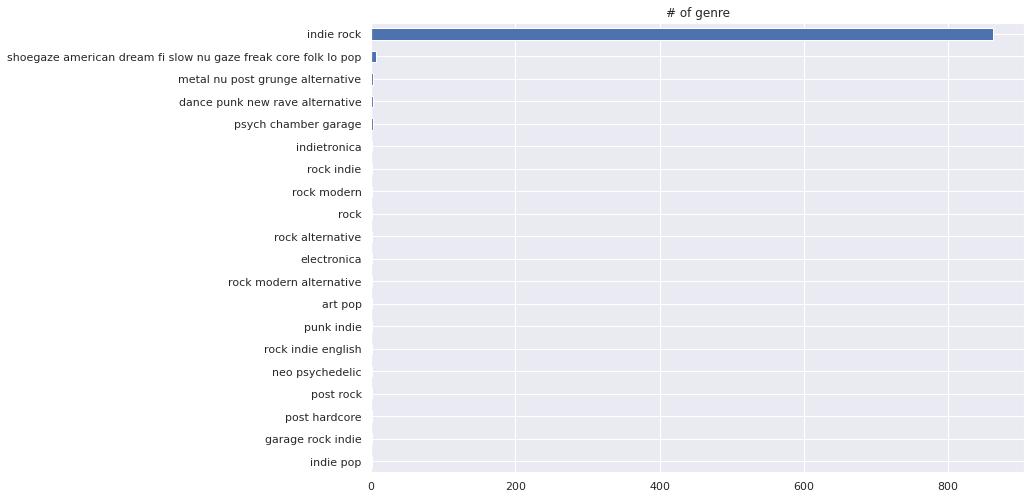

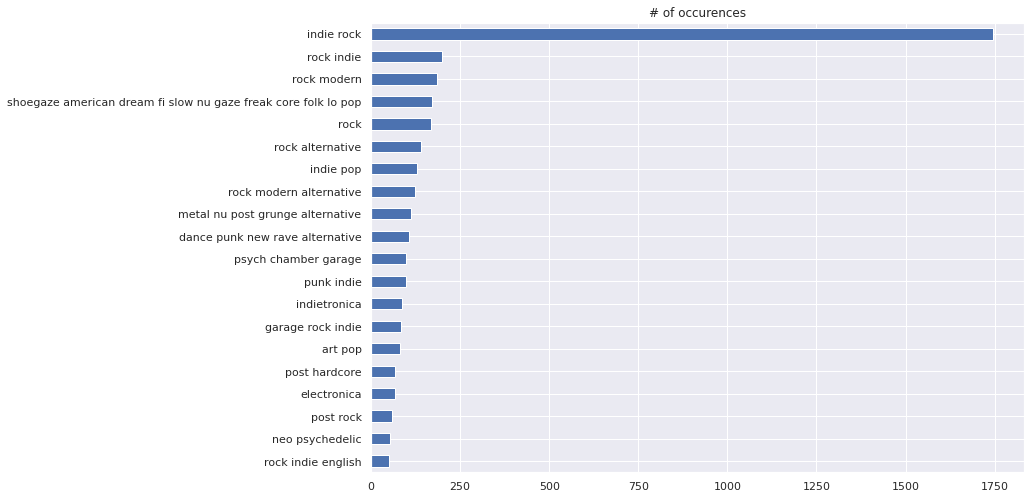

In [45]:
cluster_hierarchical = fcluster(l, 20, criterion='maxclust')

genre.cluster = cluster_hierarchical
genre._setup_supergenre()
genre._analyse_supergenre()

## HDBSCAN
The hierarchical clustering seems to struggle as there is few simmiliraty between genre (which makes sense as it is a ensemble similarity with a ranking)

there is 6 supergenres


avant indie rock garde metal         indie metal             indie deep  \
0             atmospheric sludge       ethereal wave  deep gothic post-punk   
1                 auckland indie        ethnotronica      deep groove house   
2                  aussietronica  euphoric hardstyle               deep idm   
3                    austin rock   experimental club        deep indie rock   
4         autonomous black metal   experimental folk     deep new americana   
..                           ...                 ...                    ...   
447                          NaN         witch house                    NaN   
448                          NaN               world                    NaN   
449                          NaN           wrestling                    NaN   
450                          NaN          yacht rock                    NaN   
451                          NaN             zapstep                    NaN   

    indie rock classical                rock pop ambient atmospheric american  
0                baroque  21st century classical                       ambeat  
1       baroque ensemble        abstract hip hop                 ambient folk  
2             bass house              abstractro               ambient fusion  
3              bass trap               acid rock                  ambient idm  
4              bass trip            acoustic pop                  ambient pop  
..                   ...                     ...                          ...  
447                  NaN                     NaN                          NaN  
448                  NaN                     NaN                          NaN  
449                  NaN                     NaN                          NaN  
450                  NaN                     NaN                          NaN  
451                  NaN                     NaN                          NaN  

[452 rows x 6 columns]

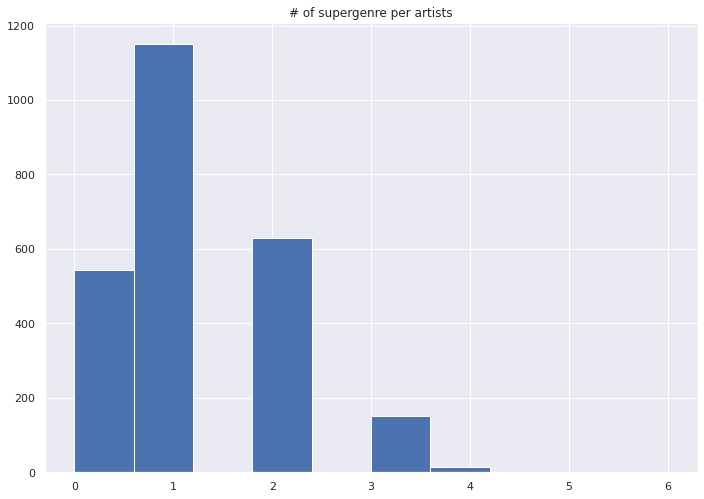

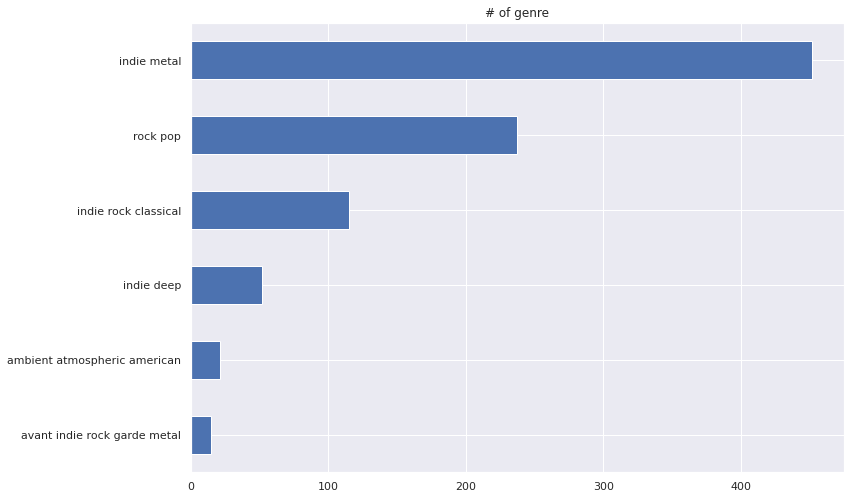

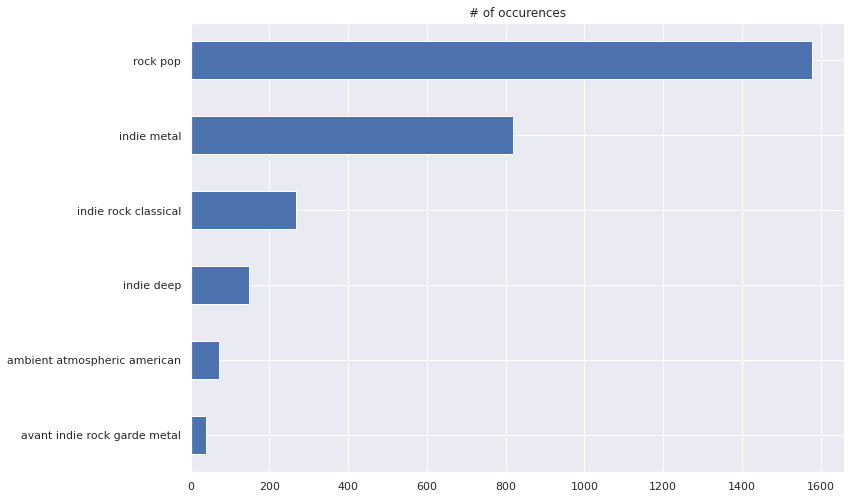

In [46]:
from hdbscan import HDBSCAN
mdl_hdbscan = HDBSCAN(
    min_cluster_size=20,
    min_samples=20,
    metric='jaccard'
)
cluster_hdbscan = mdl_hdbscan.fit_predict(genre.df_genre.transpose())

genre.cluster = cluster_hdbscan

genre._setup_supergenre()
genre._analyse_supergenre()

there is 9 supergenres


rock pop metal pop indie progressive metal jazz hip indie hop pop  \
0    abstract hip hop               bow pop                  chamber pop   
1        acoustic pop         bristol indie                 classic soul   
2         action rock             dreamgaze                    cyberpunk   
3     adult standards             funk rock                    darksynth   
4          album rock         future garage                  death metal   
..                ...                   ...                          ...   
318               NaN                   NaN                          NaN   
319               NaN                   NaN                          NaN   
320               NaN                   NaN                          NaN   
321               NaN                   NaN                          NaN   
322               NaN                   NaN                          NaN   

        indie jazz indie punk progressive rock metal indie pop  \
0         jam band               glasgow indie     early music   
1    jazz boom bap                      glitch  ecm-style jazz   
2     jazz trumpet                  glitch hop         emo rap   
3      jazztronica                gothic metal   ethereal wave   
4        kiwi rock                       grime     float house   
..             ...                         ...             ...   
318            NaN                         NaN             NaN   
319            NaN                         NaN             NaN   
320            NaN                         NaN             NaN   
321            NaN                         NaN             NaN   
322            NaN                         NaN             NaN   

                  indie pop              indie rock  \
0    early modern classical  21st century classical   
1         east anglia indie              abstractro   
2                       ebm               acid rock   
3             electro swing          adelaide indie   
4                 epic doom              afro house   
..                      ...                     ...   
318                     NaN    west yorkshire indie   
319                     NaN        windsor on indie   
320                     NaN             witch house   
321                     NaN              yacht rock   
322                     NaN                    zolo   

    black post indie classical rock contemporary  
0                                 auckland indie  
1                                     avant-rock  
2                                     beatlesque  
3                                 black 'n' roll  
4                                   black thrash  
..                                           ...  
318                                          NaN  
319                                          NaN  
320                                          NaN  
321                                          NaN  
322                                          NaN  

[323 rows x 9 columns]

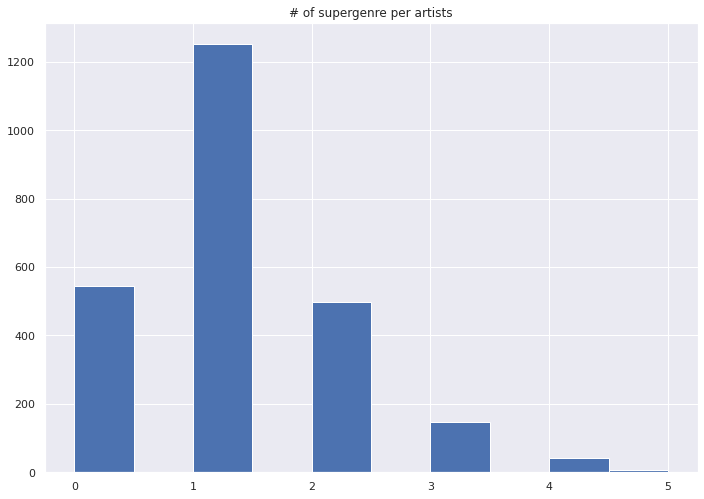

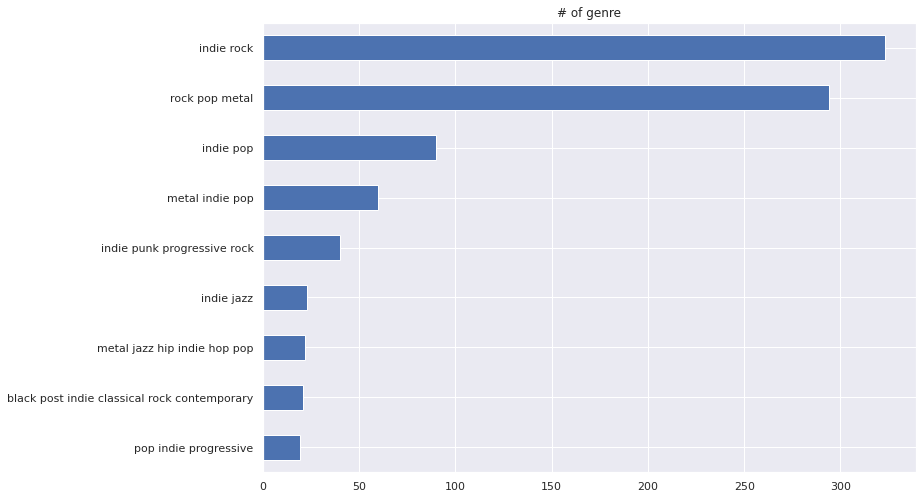

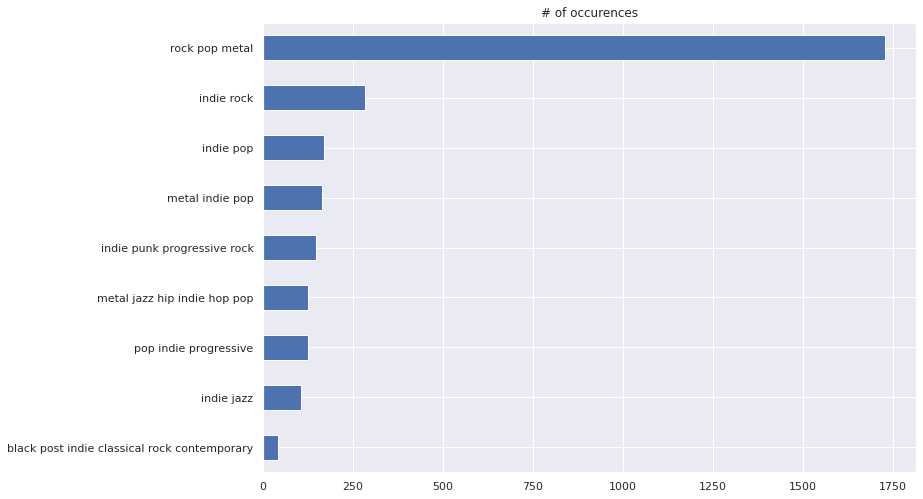

In [47]:
from hdbscan import HDBSCAN
mdl_hdbscan = HDBSCAN(
    min_cluster_size=16,
    min_samples=16,
    metric='hamming'
)
cluster_hdbscan = mdl_hdbscan.fit_predict(genre.df_genre.transpose())

genre.cluster = cluster_hdbscan

genre._setup_supergenre()
genre._analyse_supergenre()

In [48]:
genre.feature[['name', 'genres']].loc[genre.df_supergenre.iloc[:,-1] == True]

name  \
3V79CTgRnsDdJSTqKitROv                       Nobuo Uematsu   
2uDsUIyCIqk9wKj17I8WAH                      Yoko Shimomura   
4NJhFmfw43RLBLjQvxDuRS             Wolfgang Amadeus Mozart   
2DaxqgrOhkeH0fpeiQq2f4                               Oasis   
69lxxQvsfAIoQbB20bEPFC                        Philip Glass   
2Kx7MNY7cI1ENniW7vT30N                         Norah Jones   
0VE0GTaTSeeGSzrQpLmeb9                           Kvelertak   
7bHTSvk96ULRLZPZr1SoCZ                        Mallory Knox   
6TZ5t4kclsmGWHqb3mGyha                    Cassandra Wilson   
3WrFJ7ztbogyGnTHbHJFl2                         The Beatles   
3a57uEGZ0R74HROyqGYuXJ                          Devastator   
1uQWmt1OhuHGRKmZ2ZcL6p               Explosions In The Sky   
3Uz6jx81OY2J5K8Z4wmy2P                               Camel   
6CJU2RwwB10D0KoYYqWYeM                           Leviathan   
2P6ygesd9xg5DPOBnda2jg                           Arvo Pärt   
2yawagTvYt4y9mXm0d3n3p                              Cobalt   
2wOqMjp9TyABvtHdOSOTUS                Ludwig van Beethoven   
7GVByFFfFJYCzK4d8ZyL6s                     We Lost The Sea   
35g8f5IFah4OggJ9drwDfJ                         Corpo-Mente   
1Pe5hlKMCTULjosqZ6KanP       Martha Reeves & The Vandellas   
0ifzzRKdmtgaHy9cfnnyCR                               Focus   
2CWHsGc4VoumNDCICKHCZO                           Speedwolf   
0agm5ImsQfJ7Qxpi1rbkp8                              SIBIIR   
03hlOXqRyyXO3ectp3eEbU                              Iceage   
0PTyA08B3iE3XUokbUC9k8                          Juiceboxxx   
7DjwIxbe8kpw4pqnzAMoin                           The Beths   
6pJ12qda5aKt5NJax5ZJtC                        Bloody Knees   
5o7MNRaQrt87SwYWxHEZvN                          Dead Cross   
5kDp9RPBnmQzBLwVnVyVvz                         Oathbreaker   
6GTwMrB4u3hwcUyc9sU1UL                     The Minds Of 99   
0oeUpvxWsC8bWS6SnpU8b9                The Naked And Famous   
5Rl15oVamLq7FbSb0NNBNy                 5 Seconds of Summer   
1uatpkp2CbVMmQlMKFMAwe                        The Rosebuds   
1Bl6wpkWCQ4KVgnASpvzzA                        BROCKHAMPTON   
3C8RpaI3Go0yFF9whvKoED                      The Avalanches   
1R84VlXnFFULOsWWV8IrCQ                          Panda Bear   
0f3PsS9IQ6whvNMFFKnpjl  Choir of King's College, Cambridge   
62DmErcU7dqZbJaDqwsqzR                             Popcaan   
0ugRf6ECGBFRCHlv9iG1No                    Stephen Cleobury   
2NUz5P42WqkxilbI8ocN76                         Vybz Kartel   
5fMUXHkw8R8eOP2RNVYEZX                               Diplo   

                                                                   genres  
3V79CTgRnsDdJSTqKitROv  [anime score, chiptune, final fantasy, japanes...  
2uDsUIyCIqk9wKj17I8WAH  [anime score, chiptune, japanese vgm, video ga...  
4NJhFmfw43RLBLjQvxDuRS                         [classical, classical era]  
2DaxqgrOhkeH0fpeiQq2f4  [beatlesque, britpop, madchester, modern rock,...  
69lxxQvsfAIoQbB20bEPFC  [american contemporary classical, classical, c...  
2Kx7MNY7cI1ENniW7vT30N  [adult standards, contemporary vocal jazz, neo...  
0VE0GTaTSeeGSzrQpLmeb9  [black 'n' roll, black thrash, norwegian metal...  
7bHTSvk96ULRLZPZr1SoCZ  [british alternative rock, cambridgeshire indi...  
6TZ5t4kclsmGWHqb3mGyha              [contemporary vocal jazz, vocal jazz]  
3WrFJ7ztbogyGnTHbHJFl2  [beatlesque, british invasion, classic rock, m...  
3a57uEGZ0R74HROyqGYuXJ                          [black thrash, rap metal]  
1uQWmt1OhuHGRKmZ2ZcL6p  [american post-rock, cinematic post-rock, inst...  
3Uz6jx81OY2J5K8Z4wmy2P  [album rock, art rock, canterbury scene, jazz ...  
6CJU2RwwB10D0KoYYqWYeM  [atmospheric black metal, autonomous black met...  
2P6ygesd9xg5DPOBnda2jg  [baltic classical, classical, compositional am...  
2yawagTvYt4y9mXm0d3n3p                        [chaotic black metal, usbm]  
2wOqMjp9TyABvtHdOSOTUS     [classical, classical era, early romantic era]  
7GVByFFfFJYCzK4d8ZyL6s  [atmospheric post-metal, australian post-rock,...  
35g8f

We can notice that for this specific user (myself) we get the strange clustering where beethoven and the beatles finish together.
Maybe the other genre are much more listened and those artists finish as "outliers" genres

## Conclusion

We chose to go with Hamming distance and HDBSCAN

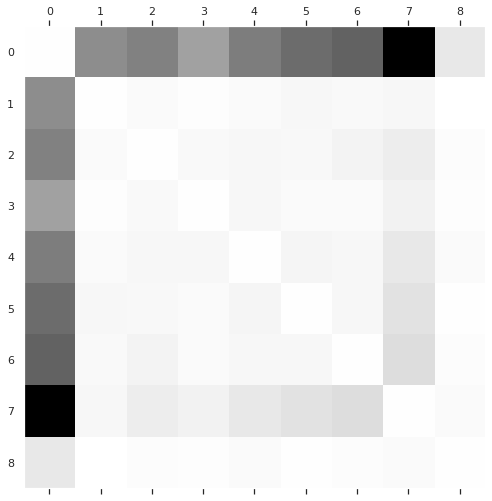

In [49]:
plt.matshow(
    genre.df_supergenre.corr(lambda x, y: sum(x*y)),
    cmap='Greys'
)
plt.grid(None)

Now we join the supergenres to the artists data in the likedsongs

In [50]:
from lib_spotify_app.util import concatenate_col
df['artists.id'] = concatenate_col(df, '^artists\.\d+\.id')
df['artists.id']

0                               VTkiwfm4ic6DnHpmFq8K]
1                               VTkiwfm4ic6DnHpmFq8K]
2                               [562Od3CffWedyz2BbeYWVn]
3                               [57ylwQTnFnIhJh4nu4rxCs]
4                               [01WjpKiWVNurV5hjIadB8C]
                              ...                       
4311    [73sIBHcqh3Z3NyqHKZ7FOL, 66CXWjxzNUsdJxJ2JdwvnR]
4312                            [73sIBHcqh3Z3NyqHKZ7FOL]
4313                            [01aC2ikO4Xgb2LUpf9JfKp]
4314                            [0Ya43ZKWHTKkAbkoJJkwIB]
4315                            [7x6qYdGPScBRRz5lOPeHnG]
Name: artists.id, Length: 4316, dtype: object

In [51]:
genre_df = genre.df_genre.apply(
    lambda row: row.index[row == True].tolist(),
    axis=1
)
display(genre_df.head())

df['artists.genres'] = df['artists.id'].map(
    lambda x: sum(genre_df.loc[x].tolist(), [])
)
display(df['artists.genres'].head())

artists_id
2mVTkiwfm4ic6DnHpmFq8K    [black metal, metal, pagan black metal, sympho...
562Od3CffWedyz2BbeYWVn    [album rock, art rock, new age, progressive ro...
57ylwQTnFnIhJh4nu4rxCs    [alternative metal, gothenburg metal, melodic ...
01WjpKiWVNurV5hjIadB8C    [alternative metal, alternative rock, grunge, ...
5ZoBIfUizydbcI4XggC56a                                                   []
dtype: object

0    [black metal, metal, pagan black metal, sympho...
1    [black metal, metal, pagan black metal, sympho...
2    [album rock, art rock, new age, progressive ro...
3    [alternative metal, gothenburg metal, melodic ...
4    [alternative metal, alternative rock, grunge, ...
Name: artists.genres, dtype: object

In [52]:
df['artists.supergenres'] = enrich_artist_genre.join_genre(
    df['artists.id'],
    genre.df_supergenre
)
display(df['artists.supergenres'])
display(df['artists.supergenres'].apply(len).value_counts())

0                             [rock pop metal, indie pop]
1                             [rock pop metal, indie pop]
2                             [rock pop metal, indie pop]
3           [rock pop metal, metal indie pop, indie rock]
4                                        [rock pop metal]
                              ...                        
4311    [rock pop metal, rock pop metal, metal jazz hi...
4312                                     [rock pop metal]
4313                         [rock pop metal, indie rock]
4314                         [rock pop metal, indie jazz]
4315                                    [metal indie pop]
Name: artists.supergenres, Length: 4316, dtype: object

1     2442
2      876
0      483
3      315
4      106
5       50
6       17
7       11
8       11
10       2
9        2
13       1
Name: artists.supergenres, dtype: int64

As not all artists have 1 supergenre, and some songs have multilple artists, I will select the lest common supergenre group in a specific column

In [53]:
df['artists.supergenre_1'] = df['artists.supergenres'].map(
    lambda x: x[-1] if len(x) > 0 else np.NaN
)
display(df['artists.supergenre_1'])

0                          indie pop
1                          indie pop
2                          indie pop
3                         indie rock
4                     rock pop metal
                    ...             
4311    metal jazz hip indie hop pop
4312                  rock pop metal
4313                      indie rock
4314                      indie jazz
4315                 metal indie pop
Name: artists.supergenre_1, Length: 4316, dtype: object

Save the data (as TSV, because we have list as values (with comma))

In [54]:
df.to_csv(r'private/data.csv', sep='\t')